In [1]:
import tensorflow as tf
tf.__version__

'2.0.0-beta0'

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv('./dataset/credit-a.csv', header=None)

In [4]:
data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,0,30.83,0.000,0,0,9,0,1.25,0,0,1,1,0,202,0.0,-1
1,1,58.67,4.460,0,0,8,1,3.04,0,0,6,1,0,43,560.0,-1
2,1,24.50,0.500,0,0,8,1,1.50,0,1,0,1,0,280,824.0,-1
3,0,27.83,1.540,0,0,9,0,3.75,0,0,5,0,0,100,3.0,-1
4,0,20.17,5.625,0,0,9,0,1.71,0,1,0,1,2,120,0.0,-1


In [5]:
data.iloc[:, -1].value_counts()

 1    357
-1    296
Name: 15, dtype: int64

In [6]:
x = data.iloc[:, :-1]
y = data.iloc[:, -1].replace(-1, 0)

In [7]:
model = tf.keras.Sequential()

In [8]:
model.add(tf.keras.layers.Dense(4, input_shape=(15,), activation='relu'))
model.add(tf.keras.layers.Dense(4, activation='relu'))
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

In [9]:
model.compile(optimizer='adam', 
             loss='binary_crossentropy',
             metrics=['acc'])

In [15]:
history = model.fit(x, y, epochs=100)

Train on 653 samples
Epoch 1/100
653/653 [==============================] - 0s 47us/sample - loss: 0.5952 - acc: 0.6861
Epoch 2/100
653/653 [==============================] - 0s 47us/sample - loss: 0.5951 - acc: 0.6815
Epoch 3/100
653/653 [==============================] - 0s 49us/sample - loss: 0.5929 - acc: 0.6830
Epoch 4/100
653/653 [==============================] - 0s 50us/sample - loss: 0.5966 - acc: 0.6631
Epoch 5/100
653/653 [==============================] - 0s 47us/sample - loss: 0.5942 - acc: 0.6830
Epoch 6/100
653/653 [==============================] - 0s 46us/sample - loss: 0.5954 - acc: 0.6815
Epoch 7/100
653/653 [==============================] - 0s 50us/sample - loss: 0.5938 - acc: 0.6753
Epoch 8/100
653/653 [==============================] - 0s 50us/sample - loss: 0.5939 - acc: 0.6861
Epoch 9/100
653/653 [==============================] - 0s 52us/sample - loss: 0.5938 - acc: 0.6845
Epoch 10/100
653/653 [==============================] - 0s 49us/sample - loss: 0.5916 - 

In [11]:
history.history.keys()

dict_keys(['loss', 'acc'])

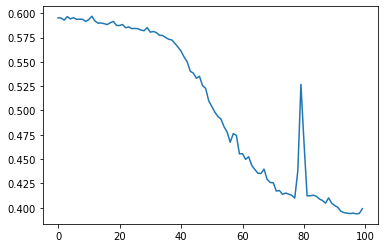

In [16]:
plt.plot(history.epoch, history.history.get('loss'))

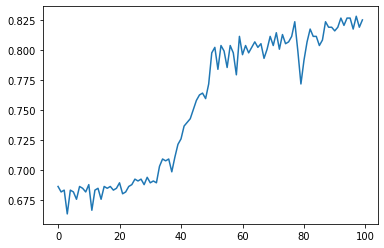

In [17]:
plt.plot(history.epoch, history.history.get('acc'))

In [14]:
model.predict(data.iloc[:10, :-1])

array([[0.57693726],
       [0.488846  ],
       [0.41988534],
       [0.58216435],
       [0.57436925],
       [0.5734164 ],
       [0.        ],
       [0.36236686],
       [0.5251414 ],
       [0.33406892]], dtype=float32)